In [124]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import PCA

from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV,train_test_split 
from sklearn.metrics import roc_auc_score,f1_score,accuracy_score,classification_report,confusion_matrix,precision_score,recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

## 1.Reading the file 

In [4]:
df = pd.read_csv("SMSSpamCollection.csv",header=None)
df.columns=['Labels','sms']
df.head(5)

,Labels,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## 2.Text preprocessing

In [14]:
#.removing stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words("english")
len(stop_words)

for i in range (len(df.sms)):
    df.sms[i]= " ".join([w for w in df.sms[i].split() if w not in stop_words])
    
#3.removing whitespaces
for i in range(len(df.sms)):
    df.sms[i] = df.sms[i].replace("  ", " ").strip()  
    
#4.lemmitization    
lemmatizer = WordNetLemmatizer()
lemmatizer 
for i in range(len(df)):
    lemma=df.sms[i]
    df.sms[i]=" ".join([lemmatizer.lemmatize(word ,pos="v") for word in nltk.word_tokenize(lemma)])
    
df.head(5)    

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\benwi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Labels,sms
0,ham,"Go jurong point , crazy .. Available bugis n g..."
1,ham,Ok lar ... Joking wif u oni ...
2,spam,Free entry 2 wkly comp win FA Cup final tkts 2...
3,ham,U dun say early hor ... U c already say ...
4,ham,"Nah I think go usf , live around though"


## 3.Data exploration

In [15]:
!pip install wordcloud

In [16]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [17]:
ham = ""
spam = ""

for i in range(len(df.sms)):
    if df.Labels[i] == "ham":
        ham = ham + df.sms[i]
    else:
        spam = spam + df.sms[i]

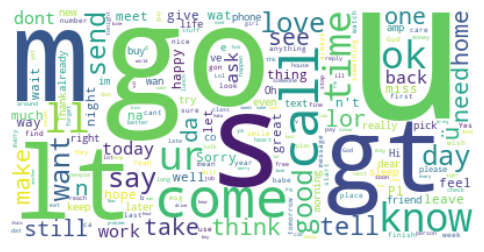

In [18]:
#Wordcloud for ham tweets
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(ham)
plt.figure(figsize=(6,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

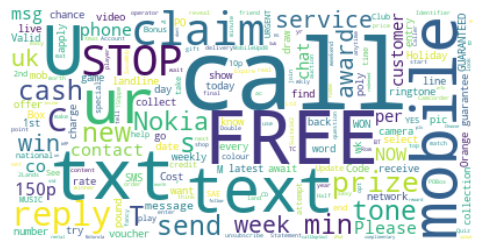

In [19]:
#Wordcloud for spam tweets
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(spam)
plt.figure(figsize=(6,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 4.Vectorization

### 1. (vectorization using TF)

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
#using count vectoroizer to create a document-term matrix
cv = CountVectorizer()
X = cv.fit_transform(df.sms)

In [36]:
X = X.toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [37]:
#The word list
names = cv.get_feature_names()

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [38]:
len(names)

7973

In [39]:
#Converting the document-term matrix to a dataframe
DTM = pd.DataFrame(X, columns=names)
DTM

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5571,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5572,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 2. (vectorization using TF-IDF)

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer=TfidfVectorizer()
tfidf_vectors=tfidf_vectorizer.fit_transform(df.sms)

names=tfidf_vectorizer.get_feature_names()

tfidf_vectors=tfidf_vectors.toarray()
tfidf_vectors=pd.DataFrame(tfidf_vectors,columns=names)

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [21]:
tfidf_vectors

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 3. vectorization(doc-to-vec model using Google’s word-to-vec model)

In [23]:
from gensim.models import KeyedVectors

In [24]:
embeddings = KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin', binary = True)

In [25]:
embeddings

In [26]:
embeddings.index_to_key

['</s>',
 'in',
 'for',
 'that',
 'is',
 'on',
 '##',
 'The',
 'with',
 'said',
 'was',
 'the',
 'at',
 'not',
 'as',
 'it',
 'be',
 'from',
 'by',
 'are',
 'I',
 'have',
 'he',
 'will',
 'has',
 '####',
 'his',
 'an',
 'this',
 'or',
 'their',
 'who',
 'they',
 'but',
 '$',
 'had',
 'year',
 'were',
 'we',
 'more',
 '###',
 'up',
 'been',
 'you',
 'its',
 'one',
 'about',
 'would',
 'which',
 'out',
 'can',
 'It',
 'all',
 'also',
 'two',
 'after',
 'first',
 'He',
 'do',
 'time',
 'than',
 'when',
 'We',
 'over',
 'last',
 'new',
 'other',
 'her',
 'people',
 'into',
 'In',
 'our',
 'there',
 'A',
 'she',
 'could',
 'just',
 'years',
 'some',
 'U.S.',
 'three',
 'million',
 'them',
 'what',
 'But',
 'so',
 'no',
 'like',
 'if',
 'only',
 'percent',
 'get',
 'did',
 'him',
 'game',
 'back',
 'because',
 'now',
 '#.#',
 'before',
 'company',
 'any',
 'team',
 'against',
 'off',
 'This',
 'most',
 'made',
 'through',
 'make',
 'second',
 'state',
 'well',
 'day',
 'season',
 'says',
 'w

In [27]:
len(embeddings.index_to_key)

3000000

In [28]:
def vec(a):
    return(embeddings[a])

In [29]:
# Converting each document into a vector
word_embeddings_list = {}

for doc in df.sms:
    vec_list = []
    for word in doc.split():
        if word in embeddings.index_to_key:
            vec_list.append(vec(word))
    word_embeddings_list[doc] = np.sum(np.array(vec_list),axis=0)

In [30]:
#Word2Vec DataFrame
sms_df = pd.DataFrame.transpose(pd.DataFrame(word_embeddings_list))
sms_df

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
"Go jurong point , crazy .. Available bugis n great world la e buffet ... Cine get amore wat ...",-0.094177,0.691162,-0.296143,2.675049,-0.247833,1.096985,0.935516,-1.197266,0.353943,1.270203,...,0.124512,0.183777,-1.508545,1.416565,0.477966,-0.348999,0.238647,-0.906067,-0.291992,0.682037
Ok lar ... Joking wif u oni ...,-0.668823,0.460327,0.262329,0.418625,-0.308594,0.160645,-0.375160,-0.434265,-0.348022,0.393799,...,0.634033,0.488525,-0.844727,-0.117432,-0.722900,-1.498535,-0.868408,-0.510345,-0.471924,0.575439
Free entry 2 wkly comp win FA Cup final tkts 21st May 2005 . Text FA 87121 receive entry question ( std txt rate ) T & C 's apply 08452810075over18 's,-1.310326,-1.227264,-1.509974,0.787140,0.388458,-0.722908,-0.788330,-2.467468,1.640625,1.913940,...,0.327759,-0.317627,-1.923706,-0.248230,-0.516586,-0.071777,-1.658447,-1.066147,-2.756454,0.415527
U dun say early hor ... U c already say ...,-0.680969,0.421967,1.235107,0.971741,-0.895020,-0.200447,-0.828247,-1.348389,-0.004395,0.962891,...,0.267822,0.571289,-0.235413,-0.142090,-0.572754,-0.915527,-0.750069,-0.082031,0.164062,1.489136
"Nah I think go usf , live around though",0.088013,0.208130,0.274170,1.451660,-0.004272,0.269714,0.407593,-0.748451,0.488647,0.737139,...,-0.230774,1.014160,-1.096191,0.677124,-0.567108,-0.843506,-0.006348,-0.708801,0.816525,-0.509644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"This 2nd time try 2 contact u. U £750 Pound prize . 2 claim easy , call 087187272008 NOW1 ! Only 10p per minute . BT-national-rate .",-0.339600,0.171265,0.794357,0.896118,-0.220955,0.795120,0.692169,-1.035400,1.328857,0.829712,...,-0.126801,0.637146,-1.271881,-0.159607,-0.702393,-1.037842,-0.616211,-0.485367,-0.136574,-0.474976
Will ü b go esplanade fr home ?,0.287354,0.578125,0.635437,0.879608,-0.351074,-0.078156,-0.526245,-0.976282,-0.206665,0.147966,...,-0.511230,0.847900,-0.932022,0.570251,-0.270752,-0.786377,-0.464722,-0.828613,-0.042480,0.599792
"Pity , * mood . So ... suggestions ?",0.053375,0.701904,0.322510,0.229004,-0.630371,0.280762,-0.116211,-0.375153,0.410645,0.278198,...,-0.665894,0.266052,-0.013107,-0.223450,0.120544,-0.450195,0.299805,-0.093262,0.094482,0.119873
The guy bitch I act like 'd interest buy something else next week give us free,1.376221,0.261810,0.424713,2.095459,-0.866576,0.393188,1.256165,-1.219894,0.897400,1.812622,...,-0.281139,1.449219,-2.362061,0.076324,-0.738403,-0.554043,0.459320,-0.709272,-0.411629,-1.423462


## 5.Dimension reduction

#### 1.PCA on TF

In [141]:
# Importing the PCA model, instantiating, training and transforming the data
from sklearn.decomposition import PCA
pca = PCA()
principalcomponents = pca.fit_transform(DTM)

# Determining the cumulative percentage of the variance explained by the prinicpal components
cum_var_arr = np.cumsum((pca.explained_variance_*100) / np.sum(pca.explained_variance_))

# Determining the number of principal components that explains the 
count=0
for i in cum_var_arr:
    if i<=95:
        count+=1
    else:
        break

# Creating the dataframe with the principal components
principalDF = pd.DataFrame(data=principalcomponents)
principalDF.head(3)
# Subsetting the dataframe based on the selected no.of principal components
#pca_tf_df = principalDF.iloc[:,:count]

,0,1,2,3,4,5,6,7,8,9,...,180,181,182,183,184,185,186,187,188,189
0,-0.061334,-0.369015,0.622332,-0.865521,0.179918,-0.317916,-0.183580,0.190831,-0.290702,-0.082312,...,-0.027995,0.017419,0.004913,-0.033551,-0.003905,0.004863,0.018910,0.019699,0.004916,-0.000819
1,-0.105163,-0.164498,-0.205514,0.125195,-0.097468,-0.170041,-0.138004,0.101381,0.094439,0.186622,...,-0.009313,-0.001866,0.008387,-0.000150,-0.000842,0.002948,-0.000093,-0.000877,0.001928,-0.001053
2,-0.126949,0.315174,0.313061,0.284742,-0.191618,-0.572226,0.880054,-0.045869,0.193638,0.013600,...,-0.008595,-0.145324,-0.085624,-0.159087,-0.027578,-0.036770,0.091913,0.004417,-0.009842,-0.005107


#### 2.PCA on TF-IDF

In [145]:
# Importing the PCA model, instantiating, training and transforming the data
from sklearn.decomposition import PCA
pca = PCA()
principalcomponents = pca.fit_transform(tfidf_vectors)

# Determining the cumulative percentage of the variance explained by the prinicpal components
cum_var_arr = np.cumsum((pca.explained_variance_*100) / np.sum(pca.explained_variance_))

# Determining the number of principal components that explains the 
count=0
for i in cum_var_arr:
    if i<=95:
        count+=1
    else:
        break

# Creating the dataframe with the principal components
tfidf_vectors = pd.DataFrame(data=principalcomponents)
tfidf_vectors.head(3)
# Subsetting the dataframe based on the selected no.of principal components
#pca_tf_df = principalDF.iloc[:,:count]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.019364,-0.013904,-0.041362,0.035264,0.117739,0.068282,-0.066051,0.023484,0.000725,-0.019161,-0.006431,-0.001794,0.003275,0.000368
1,0.243313,-0.000686,-0.010913,-0.026186,-0.003845,-0.009084,0.011271,-0.003223,-0.006857,-0.015036,-0.009822,-0.004016,-0.017351,-0.000035
2,-0.015199,-0.014503,-0.021510,-0.022134,-0.014138,-0.005872,0.016519,0.001868,-0.012361,-0.016662,-0.016307,-0.002293,-0.013680,-0.000048


#### 3.PCA on word to vec

In [146]:
pca = PCA()
principalComponents = pca.fit_transform(sms_df)
principalDf3 = pd.DataFrame(data = principalComponents,index = sms_df.index)
principalDf3

# Importing the PCA model, instantiating, training and transforming the data
from sklearn.decomposition import PCA
pca = PCA()
principalcomponents = pca.fit_transform(sms_df)

# Determining the cumulative percentage of the variance explained by the prinicpal components
cum_var_arr = np.cumsum((pca.explained_variance_*100) / np.sum(pca.explained_variance_))

# Determining the number of principal components that explains the 
count=0
for i in cum_var_arr:
    if i<=95:
        count+=1
    else:
        break

# Creating the dataframe with the principal components
sms_df = pd.DataFrame(data=principalcomponents)
sms_df.head(3)
# Subsetting the dataframe based on the selected no.of principal components
#pca_tf_df = principalDF.iloc[:,:count]

,0,1,2,3,4,5,6,7,8,9,...,123,124,125,126,127,128,129,130,131,132
0,2.442038,1.050005,1.919845,0.671984,2.416446,-0.335771,0.342768,-0.052961,-1.007265,3.289937,...,0.055269,-0.338721,0.393178,0.251783,0.418213,-0.324451,0.556755,-0.263446,0.663799,-0.123926
1,-1.700735,1.018108,1.420821,3.648543,1.312156,-0.653279,-0.640451,0.446512,0.287518,0.364314,...,0.105663,0.551383,0.061901,-0.465454,-0.119004,0.208388,-0.069666,0.046277,0.519344,0.152603
2,4.956854,4.486690,3.217638,-3.910241,2.883744,-2.960033,4.183760,-1.545742,1.995411,-0.311740,...,-0.196708,-0.448718,-0.127204,-0.708168,0.074843,0.039421,-0.196442,0.041178,-0.334031,-0.011997


### using heuristic approaches for dimension reduction

#### 4.p% of the documents on TF

In [45]:
for col in list(DTM):
    prop = DTM[col].sum()/DTM.shape[0]
    if prop*100 < 1:
        DTM = DTM.drop([col], axis = 1)

In [46]:
DTM.shape

(5574, 190)

In [47]:
DTM.head(5)

,150p,50,already,also,always,amp,and,anything,are,around,...,wish,word,work,would,www,ya,yeah,yes,you,your
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


#### 5.p% of the documents on TF-IDF

In [48]:
for col in list(tfidf_vectors):
    prop = tfidf_vectors[col].sum()/tfidf_vectors.shape[0]
    if prop*100 < 1:
        tfidf_vectors = tfidf_vectors.drop([col], axis = 1)

In [49]:
tfidf_vectors.shape

(5574, 14)

In [50]:
tfidf_vectors.head(5)

,call,come,get,go,good,gt,know,ll,lt,ok,send,time,ur,you
0,0.0,0.0,0.126096,0.136179,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.259633,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.224125,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


## 6.Spam Filters

#### Model fitting on (1.PCA on TF)

In [147]:
df['Labels'].replace({'spam':1,'ham':0},inplace = True)

In [148]:
y = df["Labels"]

In [149]:
#For test-train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(principalDF, y, test_size = 0.2,random_state=30)
X_train,X_validate,y_train,y_validate = train_test_split(X_train,y_train,test_size=0.2,random_state=30)

In [150]:
# Decision tree classifier model

dtc = DecisionTreeClassifier()
# fit the model
dtc.fit(X_train,y_train)
# train the model 
y_validate_pred = dtc.predict(X_validate)
#metrics
accuracy = accuracy_score(y_validate,y_validate_pred)
f1 = f1_score(y_validate,y_validate_pred)
recall = recall_score(y_validate,y_validate_pred)
precision = precision_score(y_validate,y_validate_pred)
con_matrix = confusion_matrix(y_validate,y_validate_pred)
print("the accuracy score for decision tree validate model : ",accuracy)
print("the f1 score for decision tree validate model : ",f1)
print("the recall for decision tree validate model : ",recall)
print("the precision for decision tree validate model : ",precision)
print("confusion_matrix",con_matrix)

the accuracy score for decision tree validate model :  0.9360986547085202
the f1 score for decision tree validate model :  0.9626229508196721
the recall for decision tree validate model :  0.95822454308094
the precision for decision tree validate model :  0.9670619235836627
confusion_matrix [[101  25]
 [ 32 734]]


In [151]:
# Random forest classifer model 

rfc = RandomForestClassifier()
# fit the model
rfc.fit(X_train,y_train)
# train the model
y_validate_r = rfc.predict(X_validate)

#metrics
accuracy = accuracy_score(y_validate,y_validate_r)
f1 = f1_score(y_validate,y_validate_r)
recall = recall_score(y_validate,y_validate_r)
precision = precision_score(y_validate,y_validate_r)
con_matrix = confusion_matrix(y_validate,y_validate_r)
print("the accuracy score for decision tree validate model : ",accuracy)
print("the f1 score for decision tree validate model : ",f1)
print("the recall for decision tree validate model : ",recall)
print("the precision for decision tree validate model : ",precision)
print("confusion_matrix",con_matrix)

the accuracy score for decision tree validate model :  0.9663677130044843
the f1 score for decision tree validate model :  0.9806451612903225
the recall for decision tree validate model :  0.9921671018276762
the precision for decision tree validate model :  0.9693877551020408
confusion_matrix [[102  24]
 [  6 760]]


In [152]:
# Adaboost classifier model 
abc = AdaBoostClassifier(random_state=30)
#fit the model
abc.fit(X_train,y_train)
#train the model
y_validate_a = abc.predict(X_validate)
#metrics
accuracy = accuracy_score(y_validate,y_validate_a)
f1 = f1_score(y_validate,y_validate_a)
recall = recall_score(y_validate,y_validate_a)
precision = precision_score(y_validate,y_validate_a)
con_matrix = confusion_matrix(y_validate,y_validate_a)
print("the accuracy score for decision tree validate model : ",accuracy)
print("the f1 score for decision tree validate model : ",f1)
print("the recall for decision tree validate model : ",recall)
print("the precision for decision tree validate model : ",precision)
print("confusion_matrix",con_matrix)

the accuracy score for decision tree validate model :  0.9641255605381166
the f1 score for decision tree validate model :  0.9793548387096774
the recall for decision tree validate model :  0.9908616187989556
the precision for decision tree validate model :  0.9681122448979592
confusion_matrix [[101  25]
 [  7 759]]


In [153]:
# bagging classifier model 
bag = BaggingClassifier(random_state=30)
#fit the model
bag.fit(X_train,y_train)
#train the model
y_validate_b = bag.predict(X_validate)
#metrices
accuracy = accuracy_score(y_validate,y_validate_b)
f1 = f1_score(y_validate,y_validate_b)
recall = recall_score(y_validate,y_validate_b)
precision = precision_score(y_validate,y_validate_b)
con_matrix = confusion_matrix(y_validate,y_validate_b)
print("the accuracy score for decision tree validate model : ",accuracy)
print("the f1 score for decision tree validate model : ",f1)
print("the recall for decision tree validate model : ",recall)
print("the precision for decision tree validate model : ",precision)
print("confusion_matrix",con_matrix)

the accuracy score for decision tree validate model :  0.9551569506726457
the f1 score for decision tree validate model :  0.9739243807040419
the recall for decision tree validate model :  0.9751958224543081
the precision for decision tree validate model :  0.97265625
confusion_matrix [[105  21]
 [ 19 747]]


#### model fitting on (2.PCA on TF-IDF)

In [154]:
df['Labels'].replace({'spam':1,'ham':0},inplace = True)

In [155]:
y = df["Labels"]

In [156]:
#For test-train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(principalDF2, y, test_size = 0.2,random_state=30)
X_train,X_validate,y_train,y_validate = train_test_split(X_train,y_train,test_size=0.2,random_state=30)

In [157]:
# Decision tree classifier model

dtc = DecisionTreeClassifier()
# fit the model
dtc.fit(X_train,y_train)
# train the model 
y_validate_pred1 = dtc.predict(X_validate)

accuracy = accuracy_score(y_validate,y_validate_pred1)
f1 = f1_score(y_validate,y_validate_pred1)
recall = recall_score(y_validate,y_validate_pred1)
precision = precision_score(y_validate,y_validate_pred1)
con_matrix = confusion_matrix(y_validate,y_validate_pred1)
print("the accuracy score for decision tree validate model : ",accuracy)
print("the f1 score for decision tree validate model : ",f1)
print("the recall for decision tree validate model : ",recall)
print("the precision for decision tree validate model : ",precision)
print("confusion_matrix",con_matrix)

the accuracy score for decision tree validate model :  0.9316143497757847
the f1 score for decision tree validate model :  0.959468438538206
the recall for decision tree validate model :  0.9425587467362925
the precision for decision tree validate model :  0.9769959404600812
confusion_matrix [[109  17]
 [ 44 722]]


In [158]:
# Random forest classifer model 

rfc = RandomForestClassifier()
# fit the model
rfc.fit(X_train,y_train)
# train the model
y_validate_r1 = rfc.predict(X_validate)

#metrics
accuracy = accuracy_score(y_validate,y_validate_r1)
f1 = f1_score(y_validate,y_validate_r1)
recall = recall_score(y_validate,y_validate_r1)
precision = precision_score(y_validate,y_validate_r1)
con_matrix = confusion_matrix(y_validate,y_validate_r1)
print("the accuracy score for decision tree validate model : ",accuracy)
print("the f1 score for decision tree validate model : ",f1)
print("the recall for decision tree validate model : ",recall)
print("the precision for decision tree validate model : ",precision)
print("confusion_matrix",con_matrix)

the accuracy score for decision tree validate model :  0.9159192825112108
the f1 score for decision tree validate model :  0.953329184816428
the recall for decision tree validate model :  1.0
the precision for decision tree validate model :  0.9108204518430439
confusion_matrix [[ 51  75]
 [  0 766]]


In [159]:
# Adaboost classifier model 
abc = AdaBoostClassifier(random_state=30)
#fit the model
abc.fit(X_train,y_train)
#train the model
y_validate_a1 = abc.predict(X_validate)
#metrics
accuracy = accuracy_score(y_validate,y_validate_a1)
f1 = f1_score(y_validate,y_validate_a1)
recall = recall_score(y_validate,y_validate_a1)
precision = precision_score(y_validate,y_validate_a1)
con_matrix = confusion_matrix(y_validate,y_validate_a1)
print("the accuracy score for decision tree validate model : ",accuracy)
print("the f1 score for decision tree validate model : ",f1)
print("the recall for decision tree validate model : ",recall)
print("the precision for decision tree validate model : ",precision)
print("confusion_matrix",con_matrix)

the accuracy score for decision tree validate model :  0.9641255605381166
the f1 score for decision tree validate model :  0.9793014230271668
the recall for decision tree validate model :  0.9882506527415144
the precision for decision tree validate model :  0.9705128205128205
confusion_matrix [[103  23]
 [  9 757]]


In [160]:
# bagging classifier model 
bag = BaggingClassifier(random_state=30)
#fit the model
bag.fit(X_train,y_train)
#train the model
y_validate_b1 = bag.predict(X_validate)
#metrics
accuracy = accuracy_score(y_validate,y_validate_b1)
f1 = f1_score(y_validate,y_validate_b1)
recall = recall_score(y_validate,y_validate_b1)
precision = precision_score(y_validate,y_validate_b1)
con_matrix = confusion_matrix(y_validate,y_validate_b1)
print("the accuracy score for decision tree validate model : ",accuracy)
print("the f1 score for decision tree validate model : ",f1)
print("the recall for decision tree validate model : ",recall)
print("the precision for decision tree validate model : ",precision)
print("confusion_matrix",con_matrix)

the accuracy score for decision tree validate model :  0.9618834080717489
the f1 score for decision tree validate model :  0.977922077922078
the recall for decision tree validate model :  0.9830287206266318
the precision for decision tree validate model :  0.9728682170542635
confusion_matrix [[105  21]
 [ 13 753]]


#### model fitting on (3.PCA on word to vec)

In [177]:
sms_df=sms_df.reset_index()

In [178]:
sms_df['index']

0          0
1          1
2          2
3          3
4          4
        ... 
5148    5148
5149    5149
5150    5150
5151    5151
5152    5152
Name: index, Length: 5153, dtype: int64

In [179]:
sms_df["label"] =np.nan #Creating a new column for Avg rating and filling with null
sms_df

,index,0,1,2,3,4,5,6,7,8,...,124,125,126,127,128,129,130,131,132,label
0,0,2.442038,1.050005,1.919845,0.671984,2.416446,-0.335771,0.342768,-0.052961,-1.007265,...,-0.338721,0.393178,0.251783,0.418213,-0.324451,0.556755,-0.263446,0.663799,-0.123926,NaN
1,1,-1.700735,1.018108,1.420821,3.648543,1.312156,-0.653279,-0.640451,0.446512,0.287518,...,0.551383,0.061901,-0.465454,-0.119004,0.208388,-0.069666,0.046277,0.519344,0.152603,NaN
2,2,4.956854,4.486690,3.217638,-3.910241,2.883744,-2.960033,4.183760,-1.545742,1.995411,...,-0.448718,-0.127204,-0.708168,0.074843,0.039421,-0.196442,0.041178,-0.334031,-0.011997,NaN
3,3,-1.314905,0.289164,1.129113,1.912953,-0.207505,-0.312083,0.111183,-0.750100,1.116992,...,0.015887,0.497554,0.150560,0.217001,-0.205194,0.056995,0.070372,-0.070632,-0.235263,NaN
4,4,-0.847219,-2.237887,-0.597327,0.630159,-0.670498,0.543495,0.830607,0.339172,0.011937,...,-0.139431,0.028286,-0.188758,-0.142539,0.085288,-0.087086,0.039337,0.059735,-0.018243,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5148,5148,0.338644,0.846895,1.174161,-2.349839,-0.003148,-1.118023,1.414571,-2.239260,2.202705,...,-0.196316,0.000714,-0.260759,0.026861,0.287640,0.184810,0.054021,0.264553,-0.124949,NaN
5149,5149,-1.702388,1.298867,1.617453,0.514634,0.027817,-0.007403,-0.447070,-1.104198,1.135339,...,-0.308564,0.098545,0.163057,0.116371,0.303148,0.337299,0.077536,-0.045258,-0.044471,NaN
5150,5150,-3.064053,-0.087284,-0.266174,-0.248610,0.389747,0.808079,-0.389873,0.095437,0.377345,...,0.108741,0.148243,0.014779,0.008700,-0.182291,-0.108724,0.292733,0.194292,0.149115,NaN
5151,5151,3.741907,-3.611468,-2.006878,-1.778033,-1.373110,-0.009206,1.239732,0.119738,-0.164723,...,0.174882,0.471980,-0.236299,-0.363678,0.129809,0.165526,-0.315624,-0.013392,-0.142851,NaN


In [180]:
for i in range(len(df.sms)): #Filling the Avg column with respective Avg rating from original file
    for j in range(len(sms_df['index'])):
        if df['sms'][i]==sms_df['index'][j]:
            sms_df.iloc[j,301]=df['Labels'][j]           

In [181]:
sms_df.isnull().sum()

index       0
0           0
1           0
2           0
3           0
         ... 
129         0
130         0
131         0
132         0
label    5153
Length: 135, dtype: int64

In [182]:
# Renaming the columns
sms_df.rename(columns = {'index':'message'}, inplace = True)

In [183]:
sms_df.head()

,message,0,1,2,3,4,5,6,7,8,...,124,125,126,127,128,129,130,131,132,label
0,0,2.442038,1.050005,1.919845,0.671984,2.416446,-0.335771,0.342768,-0.052961,-1.007265,...,-0.338721,0.393178,0.251783,0.418213,-0.324451,0.556755,-0.263446,0.663799,-0.123926,NaN
1,1,-1.700735,1.018108,1.420821,3.648543,1.312156,-0.653279,-0.640451,0.446512,0.287518,...,0.551383,0.061901,-0.465454,-0.119004,0.208388,-0.069666,0.046277,0.519344,0.152603,NaN
2,2,4.956854,4.486690,3.217638,-3.910241,2.883744,-2.960033,4.183760,-1.545742,1.995411,...,-0.448718,-0.127204,-0.708168,0.074843,0.039421,-0.196442,0.041178,-0.334031,-0.011997,NaN
3,3,-1.314905,0.289164,1.129113,1.912953,-0.207505,-0.312083,0.111183,-0.750100,1.116992,...,0.015887,0.497554,0.150560,0.217001,-0.205194,0.056995,0.070372,-0.070632,-0.235263,NaN
4,4,-0.847219,-2.237887,-0.597327,0.630159,-0.670498,0.543495,0.830607,0.339172,0.011937,...,-0.139431,0.028286,-0.188758,-0.142539,0.085288,-0.087086,0.039337,0.059735,-0.018243,NaN


In [184]:
sms_df['label'].replace({'spam':1,'ham':0},inplace=True) 

In [185]:
W2V = sms_df.drop(["label","message"],axis=1)

In [186]:
y = sms_df["label"]

In [ ]:
#For test-train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(W2V, y, test_size = 0.2,random_state=30)
X_train,X_validate,y_train,y_validate = train_test_split(X_train,y_train,test_size=0.2,random_state=30)

In [187]:
# Decision tree classifier model

dtc = DecisionTreeClassifier()
# fit the model
dtc.fit(X_train,y_train)
# train the model 
y_validate_p1 = dtc.predict(X_validate)

accuracy = accuracy_score(y_validate,y_validate_p1)
f1 = f1_score(y_validate,y_validate_p1)
recall = recall_score(y_validate,y_validate_p1)
precision = precision_score(y_validate,y_validate_p1)
con_matrix = confusion_matrix(y_validate,y_validate_p1)
print("the accuracy score for decision tree validate model : ",accuracy)
print("the f1 score for decision tree validate model : ",f1)
print("the recall for decision tree validate model : ",recall)
print("the precision for decision tree validate model : ",precision)
print("confusion_matrix",con_matrix)

the accuracy score for decision tree validate model :  0.897982062780269
the f1 score for decision tree validate model :  0.9412524209167205
the recall for decision tree validate model :  0.9516971279373369
the precision for decision tree validate model :  0.9310344827586207
confusion_matrix [[ 72  54]
 [ 37 729]]


In [188]:
# Random forest classifer model 

rfc = RandomForestClassifier()
# fit the model
rfc.fit(X_train,y_train)
# train the model
y_validate_r11 = rfc.predict(X_validate)

#metrics
accuracy = accuracy_score(y_validate,y_validate_r11)
f1 = f1_score(y_validate,y_validate_r11)
recall = recall_score(y_validate,y_validate_r11)
precision = precision_score(y_validate,y_validate_r11)
con_matrix = confusion_matrix(y_validate,y_validate_r11)
print("the accuracy score for decision tree validate model : ",accuracy)
print("the f1 score for decision tree validate model : ",f1)
print("the recall for decision tree validate model : ",recall)
print("the precision for decision tree validate model : ",precision)
print("confusion_matrix",con_matrix)

the accuracy score for decision tree validate model :  0.9091928251121076
the f1 score for decision tree validate model :  0.9479768786127168
the recall for decision tree validate model :  0.9634464751958225
the precision for decision tree validate model :  0.9329962073324906
confusion_matrix [[ 73  53]
 [ 28 738]]


In [189]:
# Adaboost classifier model 
abc = AdaBoostClassifier(random_state=30)
#fit the model
abc.fit(X_train,y_train)
#train the model
y_validate_a11 = abc.predict(X_validate)
#metrics
accuracy = accuracy_score(y_validate,y_validate_a11)
f1 = f1_score(y_validate,y_validate_a11)
recall = recall_score(y_validate,y_validate_a11)
precision = precision_score(y_validate,y_validate_a11)
con_matrix = confusion_matrix(y_validate,y_validate_a11)
print("the accuracy score for decision tree validate model : ",accuracy)
print("the f1 score for decision tree validate model : ",f1)
print("the recall for decision tree validate model : ",recall)
print("the precision for decision tree validate model : ",precision)
print("confusion_matrix",con_matrix)

the accuracy score for decision tree validate model :  0.9002242152466368
the f1 score for decision tree validate model :  0.942985265855221
the recall for decision tree validate model :  0.9608355091383812
the precision for decision tree validate model :  0.9257861635220126
confusion_matrix [[ 67  59]
 [ 30 736]]


In [190]:
# bagging classifier model 
bag = BaggingClassifier(random_state=30)
#fit the model
bag.fit(X_train,y_train)
#train the model
y_validate_b11 = bag.predict(X_validate)
#metrics
accuracy = accuracy_score(y_validate,y_validate_b11)
f1 = f1_score(y_validate,y_validate_b11)
recall = recall_score(y_validate,y_validate_b11)
precision = precision_score(y_validate,y_validate_b11)
con_matrix = confusion_matrix(y_validate,y_validate_b11)
print("the accuracy score for decision tree validate model : ",accuracy)
print("the f1 score for decision tree validate model : ",f1)
print("the recall for decision tree validate model : ",recall)
print("the precision for decision tree validate model : ",precision)
print("confusion_matrix",con_matrix)

the accuracy score for decision tree validate model :  0.9047085201793722
the f1 score for decision tree validate model :  0.945337620578778
the recall for decision tree validate model :  0.9595300261096605
the precision for decision tree validate model :  0.9315589353612167
confusion_matrix [[ 72  54]
 [ 31 735]]


#### model fitting on (p% of the documents on TF)

In [161]:
df['Labels'].replace({'spam':1,'ham':0},inplace = True)

In [162]:
y = df["Labels"]

In [163]:
#For test-train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(DTM, y, test_size = 0.2,random_state=30)
X_train,X_validate,y_train,y_validate = train_test_split(X_train,y_train,test_size=0.2,random_state=30)

In [164]:
# Decision tree classifier model

dtc = DecisionTreeClassifier()
# fit the model
dtc.fit(X_train,y_train)
# train the model 
y_validate_pred2 = dtc.predict(X_validate)

#metrics
accuracy = accuracy_score(y_validate,y_validate_pred2)
f1 = f1_score(y_validate,y_validate_pred2)
recall = recall_score(y_validate,y_validate_pred2)
precision = precision_score(y_validate,y_validate_pred2)
con_matrix = confusion_matrix(y_validate,y_validate_pred2)
print("the accuracy score for decision tree validate model : ",accuracy)
print("the f1 score for decision tree validate model : ",f1)
print("the recall for decision tree validate model : ",recall)
print("the precision for decision tree validate model : ",precision)
print("confusion_matrix",con_matrix)

the accuracy score for decision tree validate model :  0.9517937219730942
the f1 score for decision tree validate model :  0.9719137818419332
the recall for decision tree validate model :  0.9712793733681462
the precision for decision tree validate model :  0.9725490196078431
confusion_matrix [[105  21]
 [ 22 744]]


In [165]:
# Random forest classifer model 

rfc = RandomForestClassifier()
# fit the model
rfc.fit(X_train,y_train)
# train the model
y_validate_r2 = rfc.predict(X_validate)

#metrics
accuracy = accuracy_score(y_validate,y_validate_r2)
f1 = f1_score(y_validate,y_validate_r2)
recall = recall_score(y_validate,y_validate_r2)
precision = precision_score(y_validate,y_validate_r2)
con_matrix = confusion_matrix(y_validate,y_validate_r2)
print("the accuracy score for decision tree validate model : ",accuracy)
print("the f1 score for decision tree validate model : ",f1)
print("the recall for decision tree validate model : ",recall)
print("the precision for decision tree validate model : ",precision)
print("confusion_matrix",con_matrix)

the accuracy score for decision tree validate model :  0.9663677130044843
the f1 score for decision tree validate model :  0.9804941482444733
the recall for decision tree validate model :  0.9843342036553525
the precision for decision tree validate model :  0.9766839378238342
confusion_matrix [[108  18]
 [ 12 754]]


In [166]:
# Adaboost classifier model 
abc = AdaBoostClassifier(random_state=30)
#fit the model
abc.fit(X_train,y_train)
#train the model
y_validate_a2 = abc.predict(X_validate)
#metrics 
accuracy = accuracy_score(y_validate,y_validate_a2)
f1 = f1_score(y_validate,y_validate_a2)
recall = recall_score(y_validate,y_validate_a2)
precision = precision_score(y_validate,y_validate_a2)
con_matrix = confusion_matrix(y_validate,y_validate_a2)
print("the accuracy score for decision tree validate model : ",accuracy)
print("the f1 score for decision tree validate model : ",f1)
print("the recall for decision tree validate model : ",recall)
print("the precision for decision tree validate model : ",precision)
print("confusion_matrix",con_matrix)

the accuracy score for decision tree validate model :  0.9607623318385651
the f1 score for decision tree validate model :  0.9773169151004536
the recall for decision tree validate model :  0.9843342036553525
the precision for decision tree validate model :  0.9703989703989704
confusion_matrix [[103  23]
 [ 12 754]]


In [169]:
# bagging classifier model 
bag = BaggingClassifier(random_state=30)
#fit the model
bag.fit(X_train,y_train)
#train the model
y_validate_b2 = bag.predict(X_validate)
#metrics
accuracy = accuracy_score(y_validate,y_validate_b2)
f1 = f1_score(y_validate,y_validate_b2)
recall = recall_score(y_validate,y_validate_b2)
precision = precision_score(y_validate,y_validate_b2)
con_matrix = confusion_matrix(y_validate,y_validate_b2)
print("the accuracy score for decision tree validate model : ",accuracy)
print("the f1 score for decision tree validate model : ",f1)
print("the recall for decision tree validate model : ",recall)
print("the precision for decision tree validate model : ",precision)
print("confusion_matrix",con_matrix)

the accuracy score for decision tree validate model :  0.9517937219730942
the f1 score for decision tree validate model :  0.9718402095612311
the recall for decision tree validate model :  0.9686684073107049
the precision for decision tree validate model :  0.9750328515111695
confusion_matrix [[107  19]
 [ 24 742]]


#### model fitting on (p% of the documents on TF-IDF)

In [170]:
df['Labels'].replace({'spam':1,'ham':0},inplace = True)

In [171]:
y = df["Labels"]

In [172]:
#For test-train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf_vectors, y, test_size = 0.2,random_state=30)
X_train,X_validate,y_train,y_validate = train_test_split(X_train,y_train,test_size=0.2,random_state=30)

In [173]:
# Decision tree classifier model

dtc = DecisionTreeClassifier()
# fit the model
dtc.fit(X_train,y_train)
# train the model 
y_validate_pred3 = dtc.predict(X_validate)
#metrics
accuracy = accuracy_score(y_validate,y_validate_pred3)
f1 = f1_score(y_validate,y_validate_pred3)
recall = recall_score(y_validate,y_validate_pred3)
precision = precision_score(y_validate,y_validate_pred3)
con_matrix = confusion_matrix(y_validate,y_validate_pred3)
print("the accuracy score for decision tree validate model : ",accuracy)
print("the f1 score for decision tree validate model : ",f1)
print("the recall for decision tree validate model : ",recall)
print("the precision for decision tree validate model : ",precision)
print("confusion_matrix",con_matrix)

the accuracy score for decision tree validate model :  0.9013452914798207
the f1 score for decision tree validate model :  0.9431524547803617
the recall for decision tree validate model :  0.9530026109660574
the precision for decision tree validate model :  0.9335038363171355
confusion_matrix [[ 74  52]
 [ 36 730]]


In [174]:
# Random forest classifer model 

rfc = RandomForestClassifier()
# fit the model
rfc.fit(X_train,y_train)
# train the model
y_validate_r3 = rfc.predict(X_validate)

#metrics
accuracy = accuracy_score(y_validate,y_validate_r3)
f1 = f1_score(y_validate,y_validate_r3)
recall = recall_score(y_validate,y_validate_r3)
precision = precision_score(y_validate,y_validate_r3)
con_matrix = confusion_matrix(y_validate,y_validate_r3)
print("the accuracy score for decision tree validate model : ",accuracy)
print("the f1 score for decision tree validate model : ",f1)
print("the recall for decision tree validate model : ",recall)
print("the precision for decision tree validate model : ",precision)
print("confusion_matrix",con_matrix)

the accuracy score for decision tree validate model :  0.9091928251121076
the f1 score for decision tree validate model :  0.9479768786127168
the recall for decision tree validate model :  0.9634464751958225
the precision for decision tree validate model :  0.9329962073324906
confusion_matrix [[ 73  53]
 [ 28 738]]


In [175]:
# Adaboost classifier model 
abc = AdaBoostClassifier(random_state=30)
#fit the model
abc.fit(X_train,y_train)
#train the model
y_validate_a3 = abc.predict(X_validate)
#metrics
accuracy = accuracy_score(y_validate,y_validate_a3)
f1 = f1_score(y_validate,y_validate_a3)
recall = recall_score(y_validate,y_validate_a3)
precision = precision_score(y_validate,y_validate_a3)
con_matrix = confusion_matrix(y_validate,y_validate_a3)
print("the accuracy score for decision tree validate model : ",accuracy)
print("the f1 score for decision tree validate model : ",f1)
print("the recall for decision tree validate model : ",recall)
print("the precision for decision tree validate model : ",precision)
print("confusion_matrix",con_matrix)

the accuracy score for decision tree validate model :  0.9002242152466368
the f1 score for decision tree validate model :  0.942985265855221
the recall for decision tree validate model :  0.9608355091383812
the precision for decision tree validate model :  0.9257861635220126
confusion_matrix [[ 67  59]
 [ 30 736]]


In [176]:
# bagging classifier model 
bag = BaggingClassifier(random_state=30)
#fit the model
bag.fit(X_train,y_train)
#train the model
y_validate_b3 = bag.predict(X_validate)
#metrics
accuracy = accuracy_score(y_validate,y_validate_b3)
f1 = f1_score(y_validate,y_validate_b3)
recall = recall_score(y_validate,y_validate_b3)
precision = precision_score(y_validate,y_validate_b3)
con_matrix = confusion_matrix(y_validate,y_validate_b3)
print("the accuracy score for decision tree validate model : ",accuracy)
print("the f1 score for decision tree validate model : ",f1)
print("the recall for decision tree validate model : ",recall)
print("the precision for decision tree validate model : ",precision)
print("confusion_matrix",con_matrix)

the accuracy score for decision tree validate model :  0.9047085201793722
the f1 score for decision tree validate model :  0.945337620578778
the recall for decision tree validate model :  0.9595300261096605
the precision for decision tree validate model :  0.9315589353612167
confusion_matrix [[ 72  54]
 [ 31 735]]
